In [ ]:
## Loading Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import r2_score

plt.rcParams.update({'font.size': 18})   # Increase all fonts


In [3]:
path = r"Data/9223000_process.csv"
df = pd.read_csv(path)
df = df.interpolate(method='linear').bfill().ffill()
df = df[(df['SN-509'] != 0) & (df['SN-544'] != 0) & (df['SN-554'] != 0)]


C:\Users\jawad\AppData\Local\Temp\ipykernel_22752\937993947.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate(method='linear').bfill().ffill()


In [5]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Simple regression 1
X1_train = sm.add_constant(train_df['SN-544'])
model1 = sm.OLS(train_df['SN-509'], X1_train).fit()
test_df['pred_544'] = model1.predict(sm.add_constant(test_df['SN-544']))
r2_test_544 = r2_score(test_df['SN-509'], test_df['pred_544'])

# Simple regression 2
X2_train = sm.add_constant(train_df['SN-554'])
model2 = sm.OLS(train_df['SN-509'], X2_train).fit()
test_df['pred_554'] = model2.predict(sm.add_constant(test_df['SN-554']))
r2_test_554 = r2_score(test_df['SN-509'], test_df['pred_554'])
# Common axis limits
x_min = min(df['SN-544'].min(), df['SN-554'].min())
x_max = max(df['SN-544'].max(), df['SN-554'].max())
y_min = df['SN-509'].min()
y_max = df['SN-509'].max()



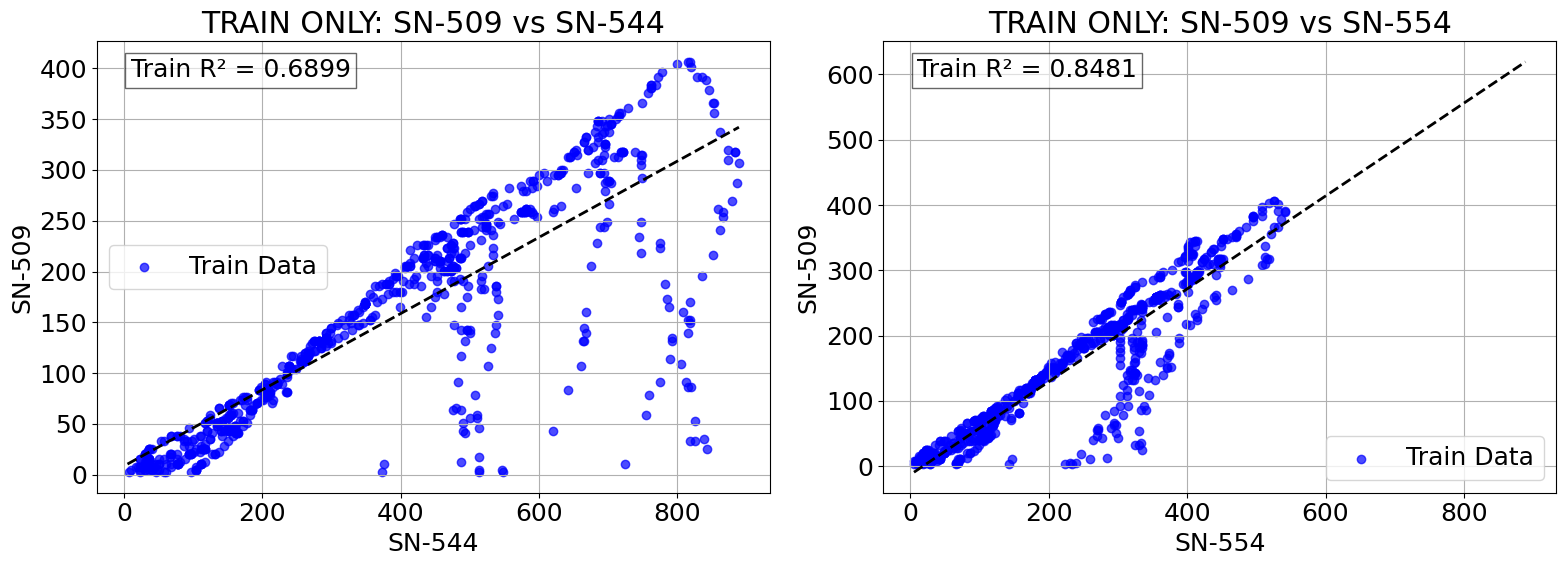

In [6]:
plt.figure(figsize=(16,6))

# SN-544 Train Scatter
plt.subplot(1,2,1)
plt.scatter(train_df['SN-544'], train_df['SN-509'], alpha=0.7, color='blue', label="Train Data")
x_vals = np.linspace(x_min, x_max, 300)
y_vals = model1.params['const'] + model1.params['SN-544'] * x_vals
plt.plot(x_vals, y_vals, color="black", linestyle='--', linewidth=2)
plt.title("TRAIN ONLY: SN-509 vs SN-544")
plt.xlabel("SN-544")
plt.ylabel("SN-509")
plt.grid(True)
plt.legend()
plt.text(0.05, 0.92, f"Train R² = {model1.rsquared:.4f}",
         transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.6))

# SN-554 Train Scatter
plt.subplot(1,2,2)
plt.scatter(train_df['SN-554'], train_df['SN-509'], alpha=0.7, color='blue', label="Train Data")
y_vals = model2.params['const'] + model2.params['SN-554'] * x_vals
plt.plot(x_vals, y_vals, color="black", linestyle='--', linewidth=2)
plt.title("TRAIN ONLY: SN-509 vs SN-554")
plt.xlabel("SN-554")
plt.ylabel("SN-509")
plt.grid(True)
plt.legend()
plt.text(0.05, 0.92, f"Train R² = {model2.rsquared:.4f}",
         transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.6))

plt.tight_layout()
plt.show()


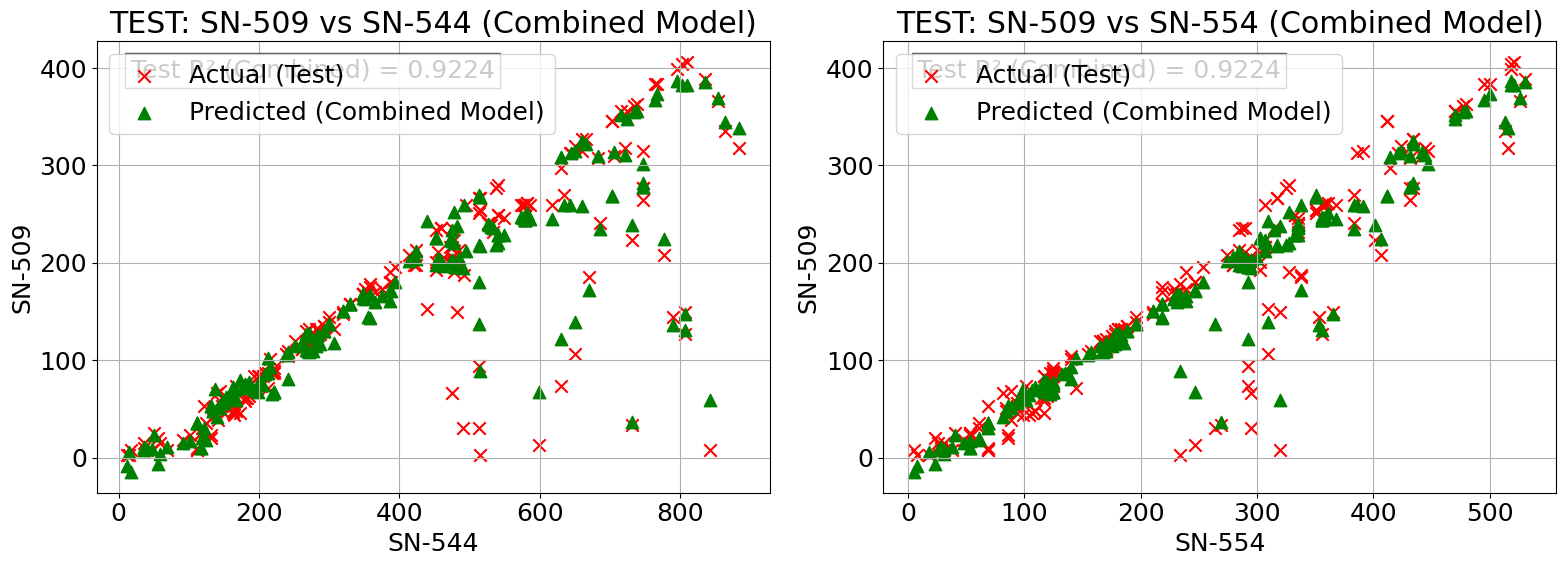

In [10]:
# Predict test data using combined model
X_test_multi = sm.add_constant(test_df[['SN-544', 'SN-554']])
test_df['pred_multi'] = model3.predict(X_test_multi)
r2_test_multi = r2_score(test_df['SN-509'], test_df['pred_multi'])

plt.figure(figsize=(16,6))

# SN-544 Test Plot (Combined Model)
plt.subplot(1,2,1)
plt.scatter(test_df['SN-544'], test_df['SN-509'], color='red', marker='x', s=80, label="Actual (Test)")
plt.scatter(test_df['SN-544'], test_df['pred_multi'], color='green', marker='^', s=80, label="Predicted (Combined Model)")
plt.title("TEST: SN-509 vs SN-544 (Combined Model)")
plt.xlabel("SN-544")
plt.ylabel("SN-509")
plt.grid(True)
plt.legend()
plt.text(0.05, 0.92, f"Test R² (Combined) = {r2_test_multi:.4f}",
         transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.7))

# SN-554 Test Plot (Combined Model)
plt.subplot(1,2,2)
plt.scatter(test_df['SN-554'], test_df['SN-509'], color='red', marker='x', s=80, label="Actual (Test)")
plt.scatter(test_df['SN-554'], test_df['pred_multi'], color='green', marker='^', s=80, label="Predicted (Combined Model)")
plt.title("TEST: SN-509 vs SN-554 (Combined Model)")
plt.xlabel("SN-554")
plt.ylabel("SN-509")
plt.grid(True)
plt.legend()
plt.text(0.05, 0.92, f"Test R² (Combined) = {r2_test_multi:.4f}",
         transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.7))

plt.tight_layout()
plt.show()


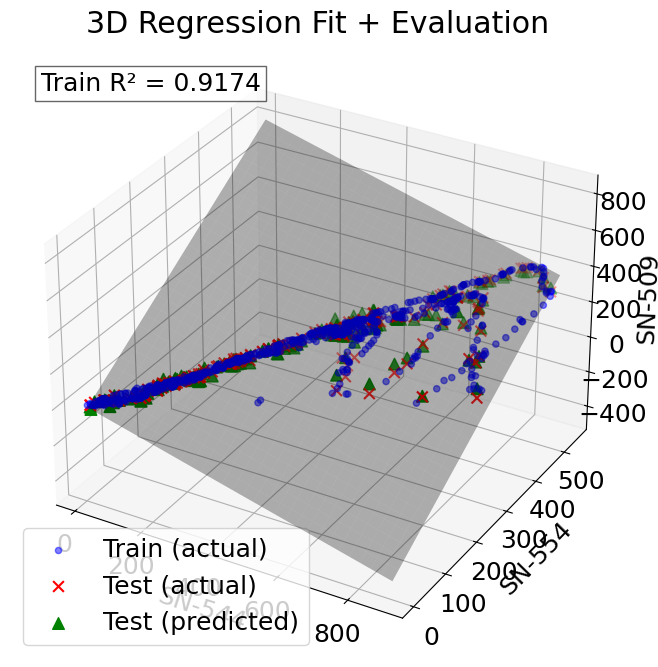

In [8]:
# Fit multivariate regression
X_train_multi = sm.add_constant(train_df[['SN-544', 'SN-554']])
model3 = sm.OLS(train_df['SN-509'], X_train_multi).fit()
test_df['pred_multi'] = model3.predict(sm.add_constant(test_df[['SN-544', 'SN-554']]))

fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(111, projection='3d')

# Train actual
ax.scatter(train_df['SN-544'], train_df['SN-554'], train_df['SN-509'], color='blue', alpha=0.5, label="Train (actual)")

# Test actual
ax.scatter(test_df['SN-544'], test_df['SN-554'], test_df['SN-509'], color='red', marker='x', s=60, label="Test (actual)")

# Test predicted
ax.scatter(test_df['SN-544'], test_df['SN-554'], test_df['pred_multi'], color='green', marker='^', s=70, label="Test (predicted)")

# Regression plane
x_surf, y_surf = np.meshgrid(np.linspace(df['SN-544'].min(), df['SN-544'].max(), 30),
                             np.linspace(df['SN-554'].min(), df['SN-554'].max(), 30))
z_surf = model3.params['const'] + model3.params['SN-544']*x_surf + model3.params['SN-554']*y_surf
ax.plot_surface(x_surf, y_surf, z_surf, alpha=0.3, color="black")

ax.set_xlabel("SN-544")
ax.set_ylabel("SN-554")
ax.set_zlabel("SN-509")
ax.set_title("3D Regression Fit + Evaluation")
ax.legend()
ax.text2D(0.05, 0.92, f"Train R² = {model3.rsquared:.4f}", transform=ax.transAxes,
          bbox=dict(facecolor='white', alpha=0.6))

plt.show()


In [9]:
print("\n=== Regression Equations (TRAIN models) ===")
b0_544 = model1.params['const']
b1_544 = model1.params['SN-544']
print(f"Simple Regression 1 (SN-544): SN-509 = {b0_544:.4f} + {b1_544:.4f} * SN-544")

b0_554 = model2.params['const']
b1_554 = model2.params['SN-554']
print(f"Simple Regression 2 (SN-554): SN-509 = {b0_554:.4f} + {b1_554:.4f} * SN-554")

b0_m = model3.params['const']
b1_m = model3.params['SN-544']
b2_m = model3.params['SN-554']
print(f"Multiple Regression: SN-509 = {b0_m:.4f} + {b1_m:.4f} * SN-544 + {b2_m:.4f} * SN-554")



=== Regression Equations (TRAIN models) ===
Simple Regression 1 (SN-544): SN-509 = 8.6390 + 0.3751 * SN-544
Simple Regression 2 (SN-554): SN-509 = -12.9880 + 0.7113 * SN-554
Multiple Regression: SN-509 = -14.0723 + -0.4941 * SN-544 + 1.5316 * SN-554
